In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Your Neural Network and ActivationFunctions classes here...
from MyNeuralNetwork import MyNeuralNetwork

def plot_scatter(y_test, predictions, structure, epochs, lr, momentum, activation):
    # Plot scatter plot for real vs predicted values
    fig, ax = plt.subplots()
    ax.scatter(y_test, predictions)
    ax.plot([0, 1], [0, 1], '--', transform=ax.transAxes, color='gray')  # Diagonal line for reference
    plt.xlim([0,1])
    plt.ylim([0,1])
    ax.set_title(f"Structure: {structure}, Epochs: {epochs}, LR: {lr}, Momentum: {momentum}, Activation: {activation}")
    ax.set_xlabel("Real Values")
    ax.set_ylabel("Predicted Values")
    plt.show()

def plot_errors(nn, predictions, structure, epochs, lr, momentum, activation):
    # Plot the evolution of training and validation errors
    error_train, error_val = nn.loss_epochs()
    epochs_range = range(1, len(error_train) + 1)

    plt.plot(epochs_range, error_train, label='Training Error')
    plt.plot(epochs_range, error_val, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Error: {structure}, Epochs: {epochs}, LR: {lr}, Momentum: {momentum}, Activation: {activation}')
    plt.legend()
    plt.show()

def run_neural_network(x_train, x_test, y_train, y_test):
    # Define hyperparameter combinations to try
    layer_structures = [(4, 8, 1), (4, 4, 1)]
    epochs_values = [500, 1000]
    learning_rates = [0.01]
    momentum_values = [0.1]
    activation_functions = ["sigmoid"]

    # Initialize variables to store results
    min_mape = float('inf')
    best_params = None
    all_results = []

    # Iterate over hyperparameter combinations
    for structure, epochs, lr, momentum, activation in product(layer_structures, epochs_values, learning_rates, momentum_values, activation_functions):
        # Ensure the last layer has only one neuron
        structure = list(structure[:-1]) + [1]

        # Initialize and train the neural network
        nn = MyNeuralNetwork(layers=structure, epochs=epochs, lr=lr, momentum=momentum, fact=activation, valid=0.5)
        nn.fit(x_train, y_train)

        # Evaluate on the test set
        predictions = nn.predict(x_test)
        # predictions = predictions * 0.8 + 0.1  # Denormalize predictions
        mape = mean_absolute_percentage_error(y_test, predictions)

        # Record results
        all_results.append({
            'Structure': structure,
            'Epochs': epochs,
            'Learning Rate': lr,
            'Momentum': momentum,
            'Activation': activation,
            'MAPE': mape
        })

        # Check if current model has the minimum MAPE
        if mape < min_mape:
            min_mape = mape
            best_params = {
                'Structure': structure,
                'Epochs': epochs,
                'Learning Rate': lr,
                'Momentum': momentum,
                'Activation': activation,
                'MAPE': mape
            }

        # Plot scatter plot for real vs predicted values
        plot_scatter(y_test, predictions, structure, epochs, lr, momentum, activation)

        # Plot error evolution
        plot_errors(nn, predictions, structure, epochs, lr, momentum, activation)

    # Print the best hyperparameters
    print("All Results:")
    print(pd.DataFrame(all_results))
    print("Best Hyperparameters:")
    print(pd.DataFrame(best_params))

# Call the function with your data
# run_neural_network(x_train, x_test, y_train, y_test)


# Dataset 1

Training - epoch:  0 Error:  17.529998096462684
Validation - epoch:  0 Error:  19.325917282957104
Training - epoch:  1 Error:  10.84148584810124
Validation - epoch:  1 Error:  12.217260116656107
Training - epoch:  2 Error:  5.827039722130013
Validation - epoch:  2 Error:  6.7628844692114685
Training - epoch:  3 Error:  3.602596915608974
Validation - epoch:  3 Error:  4.217511436010653
Training - epoch:  4 Error:  2.858185013382964
Validation - epoch:  4 Error:  3.2817510305589916
Training - epoch:  5 Error:  2.6235437957538945
Validation - epoch:  5 Error:  2.9400687228651785
Training - epoch:  6 Error:  2.5452330779851744
Validation - epoch:  6 Error:  2.802557957592555
Training - epoch:  7 Error:  2.5143007286310532
Validation - epoch:  7 Error:  2.738867562200272
Training - epoch:  8 Error:  2.4978582780723144
Validation - epoch:  8 Error:  2.704294762803505
Training - epoch:  9 Error:  2.485882686813278
Validation - epoch:  9 Error:  2.6823223241638625
Training - epoch:  10 Error: 

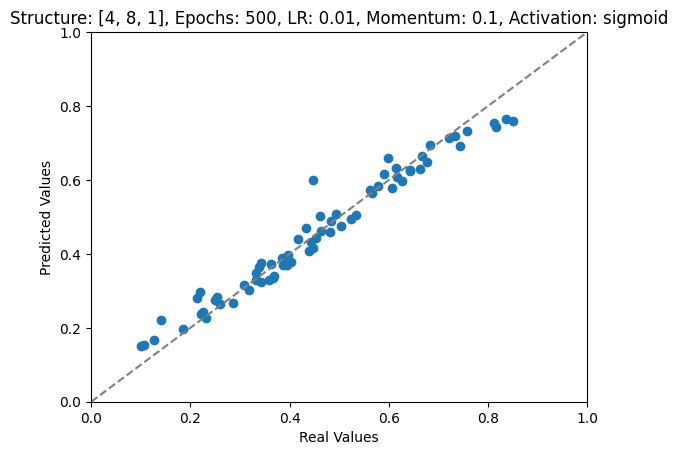

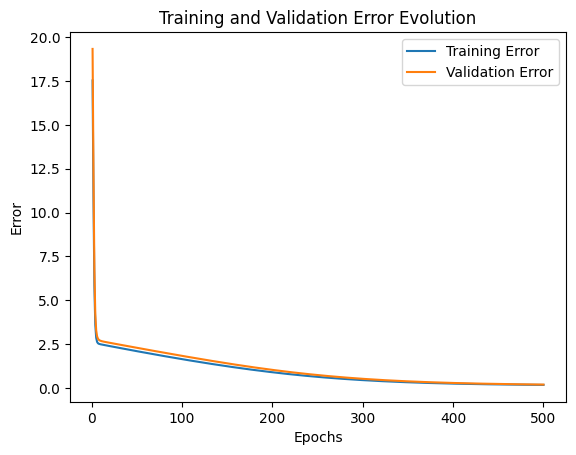

Training - epoch:  0 Error:  26.50058638153582
Validation - epoch:  0 Error:  26.378685854632298
Training - epoch:  1 Error:  22.177101420915168
Validation - epoch:  1 Error:  22.165964833342592
Training - epoch:  2 Error:  16.07558254341191
Validation - epoch:  2 Error:  16.201125670824133
Training - epoch:  3 Error:  9.696992971645274
Validation - epoch:  3 Error:  9.961586073730746
Training - epoch:  4 Error:  5.588026566356318
Validation - epoch:  4 Error:  5.978729520391718
Training - epoch:  5 Error:  3.8195703022704737
Validation - epoch:  5 Error:  4.312759306579163
Training - epoch:  6 Error:  3.1762729913468357
Validation - epoch:  6 Error:  3.741169349737933
Training - epoch:  7 Error:  2.9458133887695657
Validation - epoch:  7 Error:  3.5564528824650234
Training - epoch:  8 Error:  2.85888194322594
Validation - epoch:  8 Error:  3.497449274115489
Training - epoch:  9 Error:  2.8225309570736314
Validation - epoch:  9 Error:  3.4777125963427626
Training - epoch:  10 Error:  2

KeyboardInterrupt: 

In [10]:
# Import txt file
df1 = pd.read_csv('A1-turbine.txt', sep="\t", decimal=".")

# Separate features (x1) and target variable (y1)
x1, y1 = df1.drop(["power"], axis=1), df1[["power"]]

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x1)
y1 = scaler.fit_transform(y1)
y1 = y1 * 0.8 + 0.1  # Transform y1 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.15, random_state=42)

# Call the run_neural_network function
run_neural_network(x1_train, x1_test, y1_train, y1_test)

# Dataset 2

In [7]:
# Import txt file
df2 = pd.read_csv('A1-synthetic.txt', sep="\t", decimal=".")

# Rename the column '#v1' to 'v1'
df2.rename(columns={'#v1': 'v1'}, inplace=True)

# Separate features (x2) and target variable (y2)
x2, y2 = df2.drop(["z"], axis=1), df2[["z"]]

# Scale the features and target variable to the range [0, 1]
x2 = scaler.fit_transform(x2)
y2 = scaler.fit_transform(y2)
y2 = y2 * 0.8 + 0.1  # Transform y2 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Call the run_neural_network function
run_neural_network(x2_train, x2_test, y2_train, y2_test)

ValueError: shapes (8,4) and (9,) not aligned: 4 (dim 1) != 9 (dim 0)

# Dataset 3

In [ ]:
# Read data from CSV file
df3 = pd.read_csv('data.csv', sep=",", decimal=".")

# Calculate z-scores for the 'price' column and filter out values with z-scores greater than 0.8 for data normalization
from scipy.stats import zscore
z_scores = zscore(df3["price"])
abs_z_scores = np.abs(z_scores)
df3 = df3[(abs_z_scores < 0.8)]

# Drop redundant columns from the DataFrame
df3 = df3.drop(["date", "waterfront", "view", "yr_built", "yr_renovated", "street", "statezip", "country"], axis=1)

# Check for missing values in the DataFrame (There are no missing values)
missing_values = df3.isnull().sum()

# Perform one-hot encoding for the 'city' column to get rid of categorical data
df3 = pd.get_dummies(df3, columns=['city'])
# Convert boolean values to integers (1 for True, 0 for False)
df3 = df3.astype(int)

# Separate features (x3) and target variable (y3)
x3, y3 = df3.drop(["price"], axis=1), df3[["price"]]

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
x3 = scaler.fit_transform(x3)
y3 = scaler.fit_transform(y3)
y3 = y3 * 0.8 + 0.1  # Transform y3 to the desired range [0.1, 0.9]

# Split the data into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Call the run_neural_network function
run_neural_network(x3_train, x3_test, y3_train, y3_test)